In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn import linear_model
# 数据是否需要标准化
scale = False

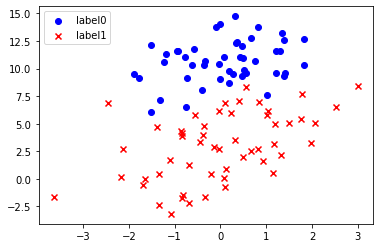

In [2]:
# 载入数据
data = np.genfromtxt("LR-testSet.csv", delimiter=",")
x_data = data[:,:-1]
y_data = data[:,-1]
    
def plot():
    x0 = []
    x1 = []
    y0 = []
    y1 = []
    # 切分不同类别的数据
    for i in range(len(x_data)):
        if y_data[i]==0:
            x0.append(x_data[i,0])
            y0.append(x_data[i,1])
        else:
            x1.append(x_data[i,0])
            y1.append(x_data[i,1])

    # 画图
    scatter0 = plt.scatter(x0, y0, c='b', marker='o')
    scatter1 = plt.scatter(x1, y1, c='r', marker='x')
    #画图例
    plt.legend(handles=[scatter0,scatter1],labels=['label0','label1'],loc='best')
    
plot()
plt.show()

In [3]:
logistic = linear_model.LogisticRegression()
logistic.fit(x_data,y_data)

LogisticRegression()

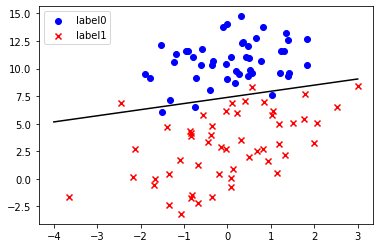

In [6]:
if scale == False:
    #画出决策边界
    plot()
    x_test = np.array([[-4],[3]])
    y_test = (-logistic.intercept_ - x_test*logistic.coef_[0][0])/logistic.coef_[0][1]
    plt.plot(x_test,y_test,'k')
    plt.show()

In [7]:
predictions = logistic.predict(x_data)

print(classification_report(y_data, predictions))

              precision    recall  f1-score   support

         0.0       0.96      0.94      0.95        47
         1.0       0.94      0.96      0.95        53

    accuracy                           0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100

